# This is a sample code from BingChat to show featurewiz in action

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import featurewiz as fw

Imported 0.2.7 version. Select nrows to a small number when running on huge datasets.
output = featurewiz(dataname, target, corr_limit=0.90, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None, skip_sulov=False)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']



In [2]:
# load the dataset
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', 
                   header=None)
data.columns = ['id', 'diagnosis'] + ['f' + str(i) for i in range(1, 31)]
data.head()

,id,diagnosis,f1,f2,f3,f4,f5,f6,f7,f8,...,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
#Next, I’ll split the dataset into train and test sets:

# split the dataset into train and test sets
X = data.drop(['id', 'diagnosis'], axis=1)
y = data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((455, 30), (114, 30))

In [4]:
#Then, I’ll fit a logistic regression model on the original train set and evaluate its performance on the test set:

# fit a logistic regression model on the original train set
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# evaluate the model on the test set
y_pred = model.predict(X_test)
f1_score_before = f1_score(y_test, y_pred, pos_label='M')
print('F1 score before feature selection:', f1_score_before)

#F1 score before feature selection: 0.9397590361445783

F1 score before feature selection: 0.9397590361445783


In [7]:
target = 'diagnosis'

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
featurewiz has selected 0.7 as the correlation limit. Change this limit to fit your needs...
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Binary_Classification problem ####
    Loaded train data. Shape = (455, 31)
#### Single_Label Binary_Classification problem ####
No test data filename given...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#############################################

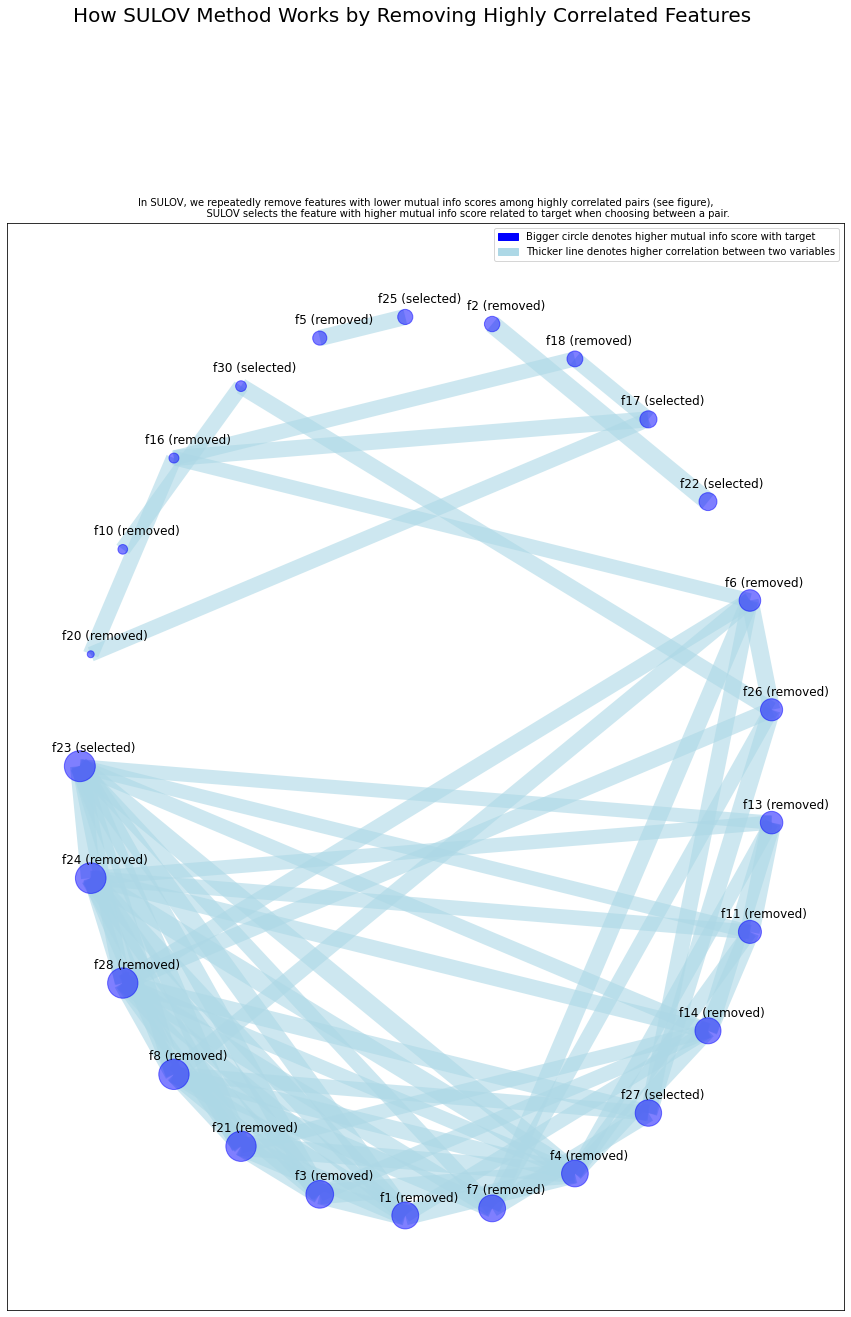

Time taken for SULOV method = 1 seconds
    Adding 0 categorical variables to reduced numeric variables  of 11
Final list of selected 11 vars after SULOV = ['f12', 'f15', 'f19', 'f29', 'f9', 'f23', 'f27', 'f22', 'f17', 'f25', 'f30']
Converting all features to numeric before sending to XGBoost...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
Current number of predictors before recursive XGBoost = 11 
    Taking top 7 features per iteration...
    XGBoost version using 1.5.2 as tree method: hist
Number of booster rounds = 100
        using 11 variables...
            selecting 5 features in this iteration
            Time taken for regular XGBoost feature selection = 0 seconds
        using 9 variables...
            selecting 4 features in this it

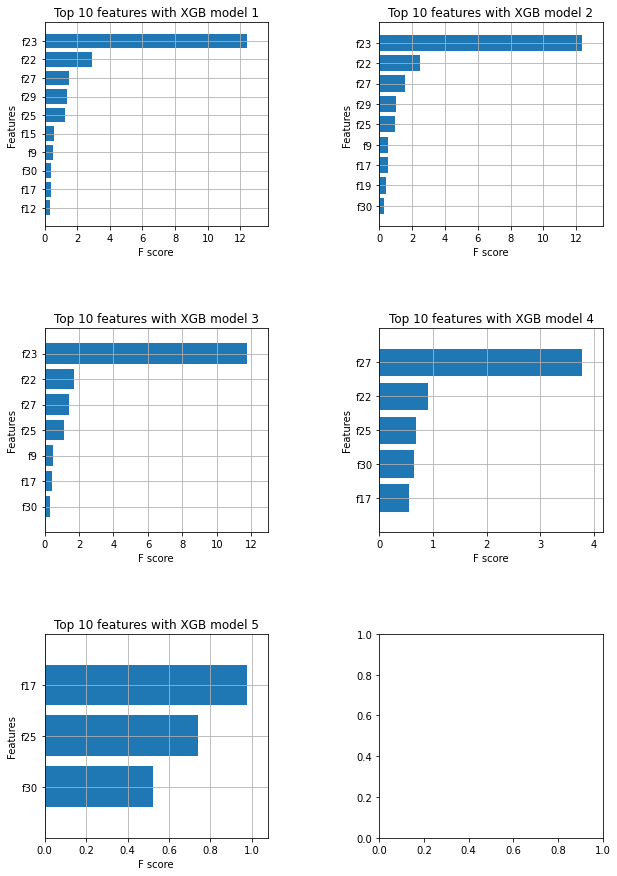

    Completed XGBoost feature selection in 1 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 7 important features:
['f23', 'f22', 'f27', 'f29', 'f25', 'f17', 'f30']
Total Time taken for featurewiz selection = 3 seconds
Output contains a list of 7 important features and a train dataframe
Selected features: ['f23', 'f22', 'f27', 'f29', 'f25', 'f17', 'f30']


In [9]:
#Now, I’ll use featurewiz to select the best features from the train set using a single line of code:

# use featurewiz to select the best features from the train set
selected_features, trainm = fw.featurewiz(X_train.join(y_train),target=target, corr_limit=0.7, verbose=2)
print('Selected features:', selected_features)

#Selected features: [‘f28’, ‘f22’, ‘f7’, ‘f27’, ‘f21’, ‘f13’, ‘f3’, ‘f24’]

#Finally, I’ll fit another logistic regression model on the selected features of the train set and evaluate its performance on the test set:

In [10]:
# fit another logistic regression model on the selected features of the train set
model2 = LogisticRegression(max_iter=1000)
model2.fit(X_train[selected_features], y_train)

# evaluate the model on the test set
y_pred2 = model2.predict(X_test[selected_features])
f1_score_after = f1_score(y_test, y_pred2, pos_label='M')
print('F1 score after feature selection:', f1_score_after)

#F1 score after feature selection: 0.9523809523809524

F1 score after feature selection: 0.9523809523809524


# As you can see, featurewiz reduced the number of features from 30 to 8 without compromising the performance of the model (in fact, it slightly improved it). This shows that featurewiz can be a useful tool for feature selection and simplifying your data analysis.